<a href="https://colab.research.google.com/github/creativechirag26/Machine_Learning_Projects/blob/main/California_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('content/')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


In [ ]:
! pip install kaggle

In [ ]:
! pip install scikit-learn

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!pip install opendatasets
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/camnugent/california-housing-prices")

Skipping, found downloaded files in "./california-housing-prices" (use force=True to force download)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import os
from tqdm import TqdmDeprecationWarning
import warnings
import random
import ydata_profiling
from ydata_profiling import ProfileReport
from IPython.display import HTML
from sklearn.preprocessing import LabelEncoder

In [ ]:
housing=pd.read_csv('/content/california-housing-prices/housing.csv')

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing.isnull().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing.isna().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
categorical_values=['ocean_proximity']
numerical_values=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

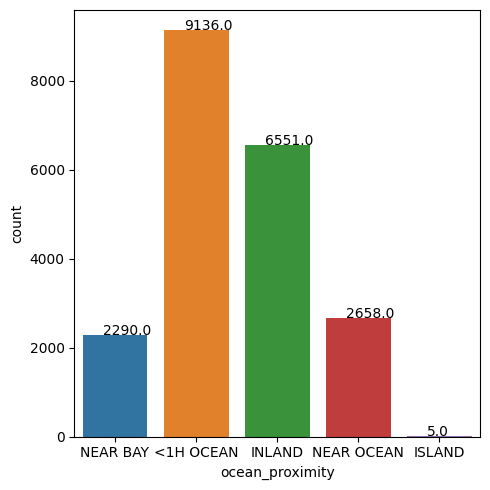

In [ ]:
plt.figure(figsize=[5,5])
ax=sns.countplot(data=housing,x='ocean_proximity')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))
plt.tight_layout()
plt.show()

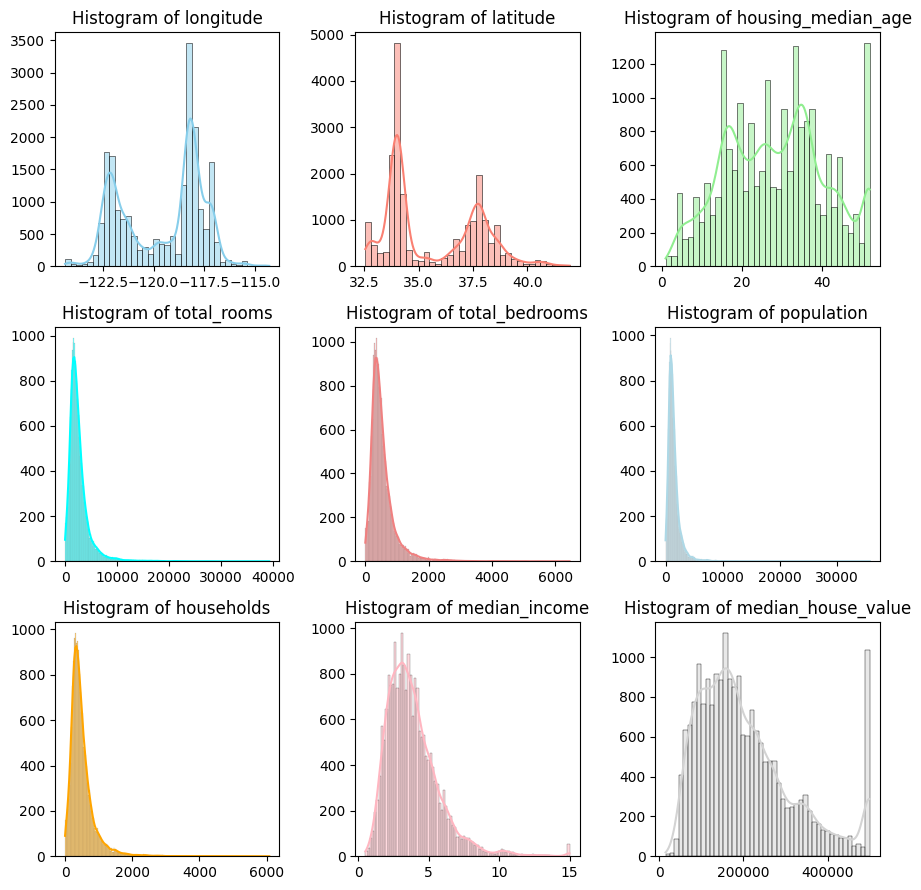

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(9, 9))
colors = ['skyblue', 'salmon', 'lightgreen', 'cyan', 'lightcoral', 'lightblue', 'orange', 'lightpink', 'lightgray']

ax = ax.flatten()

for i in range(9):
    sns.histplot(data=housing, x=numerical_values[i], ax=ax[i], kde=True,color=colors[i])
    ax[i].set_title(f'Histogram of {numerical_values[i]}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
housing.drop(housing[housing['ocean_proximity'] == 'ISLAND'].index, inplace=True)


In [ ]:
le = LabelEncoder()
housing['ocean_proximity']=le.fit_transform(housing['ocean_proximity'])

housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [ ]:
housing.shape

(20635, 10)

In [ ]:
housing=housing.drop(columns=['longitude'])

In [ ]:
housing.head(5)

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2


In [ ]:
correlation_matrix = housing.corr()
correlation_ocean_longitude = correlation_matrix.loc['longitude', 'ocean_proximity']
correlation_rooms_bedrooms = correlation_matrix.loc['total_rooms', 'total_bedrooms']
print(f'Correlation between longitude and ocean_proximity: {correlation_ocean_longitude}')
print(f'Correlation between total_rooms and total_bedrooms: {correlation_rooms_bedrooms}')

Correlation between longitude and ocean_proximity: -0.26966752757597773
Correlation between total_rooms and total_bedrooms: 0.9303817671192236
